In [1]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [2]:
import yfinance as yf

# Download TSLA data from 2018-01-01 to 2025-04-30
df_fxi = yf.download(
    "FXI", 
    start="2018-01-01", 
    end="2025-05-01"   # end date is exclusive, so use 2025-05-01 for up to April 30
)

# Reset index to make 'Date' a column
df_fxi.reset_index(inplace=True)



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:



# Save the DataFrame as a CSV file in the correct folder
#df_fxi.to_csv(r"C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\FXI_historical_data.csv", index=False)


In [4]:
print("Null values count per column:")
print(df_fxi.isnull().sum())


Null values count per column:
Price   Ticker
Date              0
Close   FXI       0
High    FXI       0
Low     FXI       0
Open    FXI       0
Volume  FXI       0
dtype: int64


In [5]:
df_fxi.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,FXI,FXI,FXI,FXI,FXI
count,1842,1842.000000,1842.000000,1842.000000,1842.000000,1.842000e+03
mean,2021-08-29 14:06:38.697068544,33.508277,33.724374,33.278045,33.506348,3.260144e+07
min,2018-01-02 00:00:00,19.535595,19.731416,19.460996,19.507620,4.769900e+06
25%,2019-10-30 06:00:00,27.509443,27.764305,27.270640,27.588199,2.057440e+07
50%,2021-08-28 12:00:00,34.941620,35.163448,34.675625,34.907004,2.818950e+07
75%,2023-06-28 18:00:00,38.007838,38.148362,37.805303,38.018540,3.947845e+07
max,2025-04-30 00:00:00,49.846745,49.901650,49.480694,49.709475,3.228069e+08
std,NaN,6.262692,6.267919,6.244842,6.262972,2.084353e+07


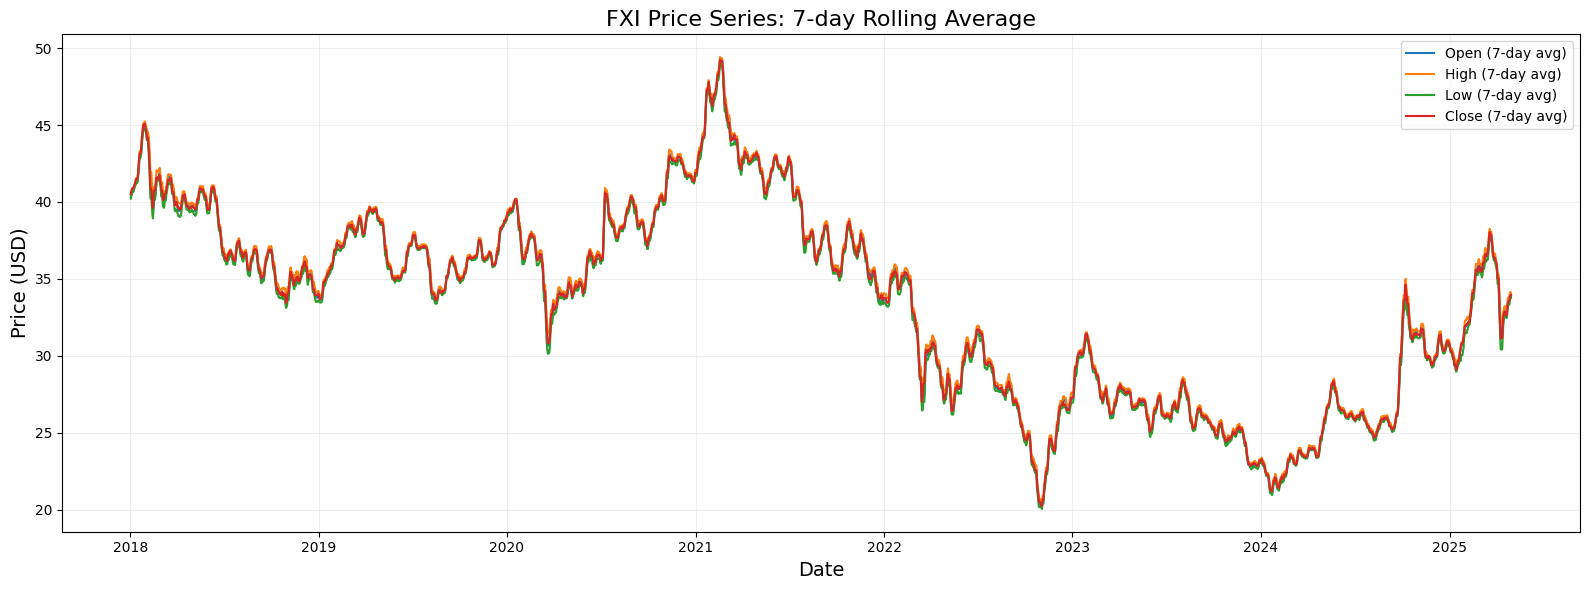

In [6]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_fxi, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("FXI Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


In [9]:
print(df_fxi.columns)
print(df_fxi.columns[df_fxi.columns.duplicated()])
print(type(df_fxi['Close']))  # Should be Series, not DataFrame!



MultiIndex([(  'Date',    ''),
            ( 'Close', 'FXI'),
            (  'High', 'FXI'),
            (   'Low', 'FXI'),
            (  'Open', 'FXI'),
            ('Volume', 'FXI')],
           names=['Price', 'Ticker'])
MultiIndex([], names=['Price', 'Ticker'])
<class 'pandas.core.frame.DataFrame'>


In [11]:
df_fxi.columns = ['_'.join([str(c) for c in col if c]) for col in df_fxi.columns.values]
# Now 'Close_FXI', 'High_FXI', ...


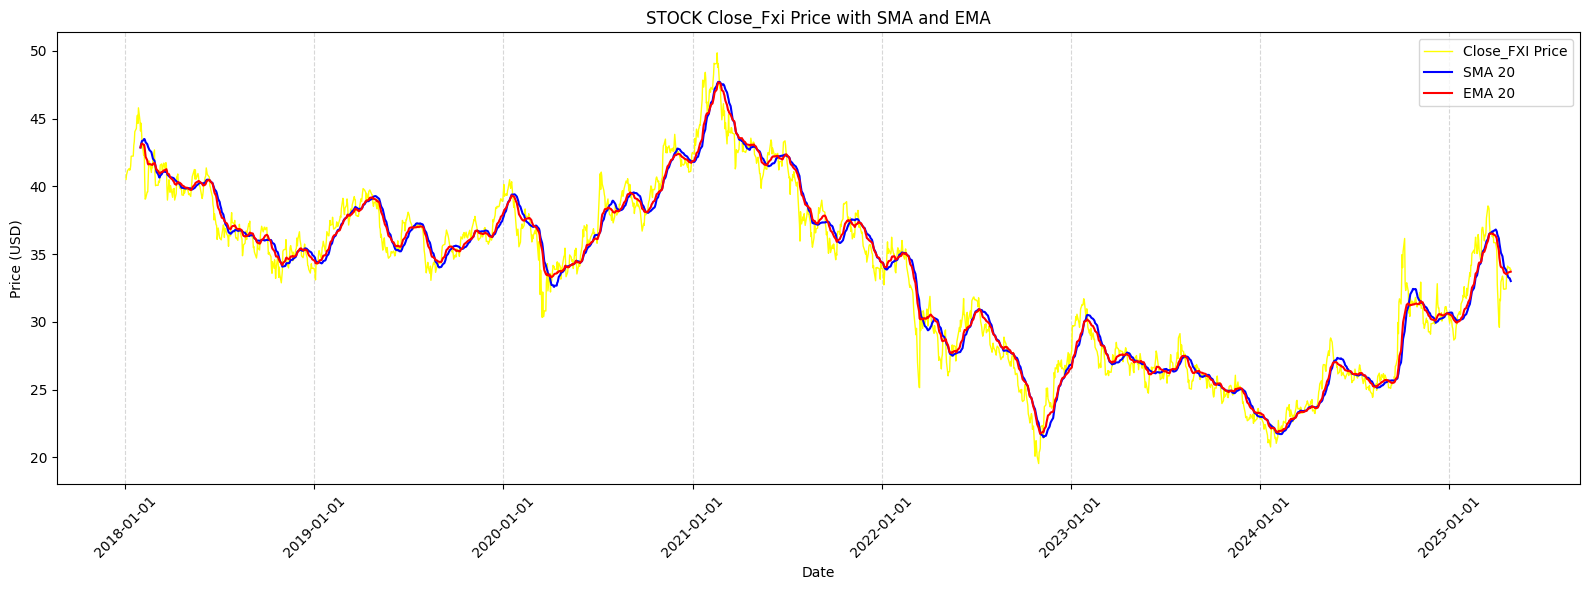

In [13]:
from src.plot_ma import plot_ma
plot_ma(df_fxi, 'Close_FXI')

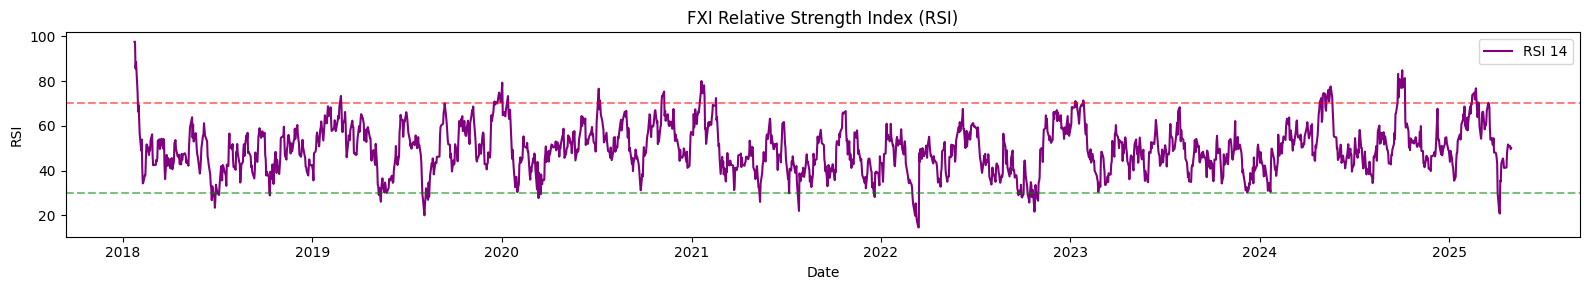

In [14]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_fxi, price_col='Close_FXI', ticker_name='FXI')

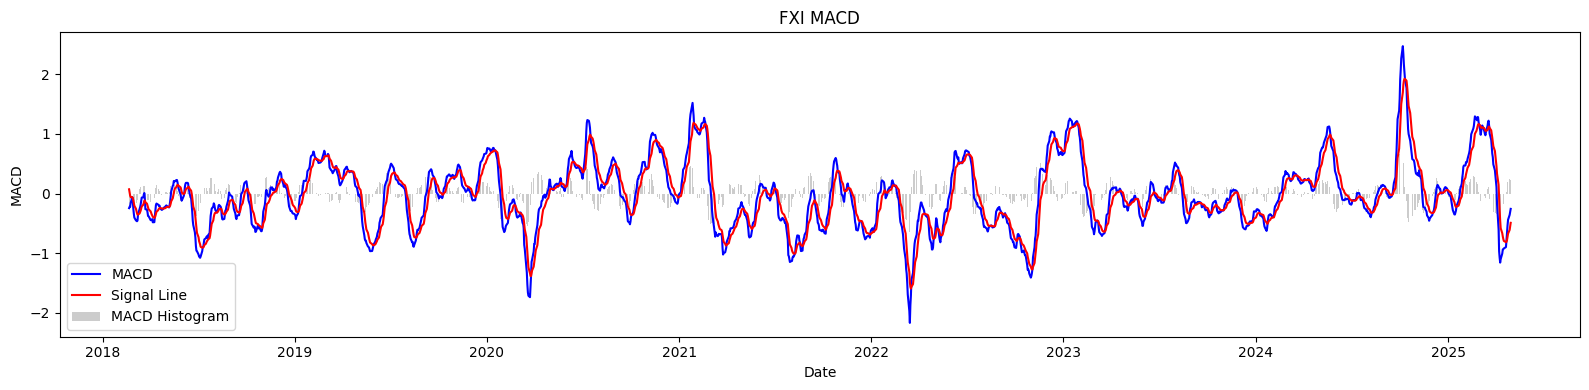

In [15]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_fxi, price_col='Close_FXI', ticker_name='FXI')